# Exploratory analysis

1. This workbook covers some basic exploratory analyses to understand the data better
2. Both Review data and Product (meta data) have been analyzed here
3. Image data has not been analyzed

In [1]:
import pandas as pd
import gzip

In [2]:
%cd /Users/Deepthi/Documents/DSE/Capstone/Data/From Julius

/Users/Deepthi/Documents/DSE/Capstone/Data/From Julius


In [6]:
# !ls

In [4]:
## Women's metadata
df_meta = pd.read_hdf('cleaned.hd5', key='womens')

In [5]:
df_review = pd.read_csv('reviews_Women_ALL_scraped.csv')

In [7]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Analyze customers

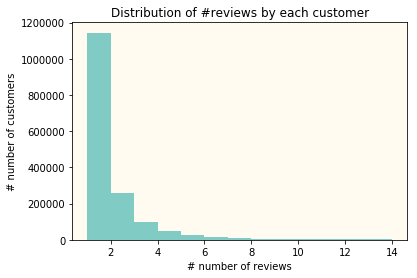

In [8]:
## Number of reviews by each customer
## This histogram shows that most customers write 5 reviews

# df_review.groupby(['reviewerID']).asin.nunique().reset_index()['asin'].hist(bins=range(5,25,1))

ax = df_review.groupby(['reviewerId']).asin.nunique().reset_index()['asin'].plot(kind = 'hist',bins =range(1,15,1),\
                                                                                 title = 'Distribution of #reviews by each customer'\
                                                                                ,facecolor='#80cbc4')
ax.set_xlabel('# number of reviews')
ax.set_ylabel('# number of customers')
ax.set_facecolor('#fffbf0')
plt.show()

In [9]:
df_review2 = df_review.groupby(['reviewerId']).asin.nunique().reset_index().groupby('asin').reviewerId.nunique().reset_index()

In [10]:
df_review2['pct_reviewers']=df_review2['reviewerId']*100/df_review2['reviewerId'].sum()

In [12]:
# Customers with 0-4 reviews form about 95% of the data. So 5 core happens to be 5% of the data.
# df_review2

In [13]:
## To plot the same distribution as %
df = df_review.groupby(['reviewerId']).asin.nunique().reset_index()
df2= df.groupby(['asin']).reviewerId.nunique().reset_index().sort_values('reviewerId',ascending = False)

In [14]:
def flag(row):
        if row['asin'] == 0 :
            return '00'
        if row['asin'] == 1 :
            return '01'
        if row['asin'] == 2 :
            return '02'
        if row['asin'] == 3 :
            return '03'
        if row['asin'] == 4 :
            return '04'
        if row['asin'] == 5 :
            return '05'
        if row['asin'] == 6 :
            return '06'
        if row['asin'] == 7 :
            return '07'
        if row['asin'] == 8 :
            return '08'
        if row['asin'] == 9 :
            return '09'
        if row['asin'] == 10 :
            return '10'
        if row['asin'] > 10 :
            return '>10'

In [15]:
df2['flag']=df2.apply(lambda row: flag(row),axis=1)
df3 = df2.groupby(['flag']).reviewerId.sum().reset_index()

In [16]:
df3['pct'] = df3['reviewerId']/(df3['reviewerId'].sum())*100

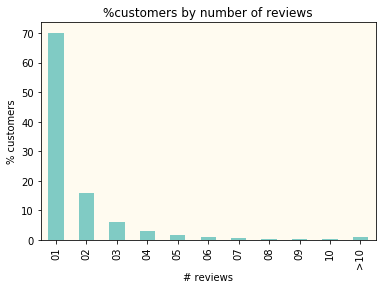

In [19]:
ax = df3.sort_values('flag',ascending=True).plot(kind='bar',x = 'flag',y='pct', color ='#80cbc4',\
                                     title='%customers by number of reviews'\
                                     ,legend = False)
ax.set_xlabel('# reviews')
ax.set_ylabel('% customers')
ax.set_facecolor('#fffbf0')
plt.show()

## This graph says that 40% of the customers write 5 reviews 
## 75% of the reviews are written by customers writing upto 7 reviews

### Reviews by time

In [20]:
df_review['unixReviewTime2']=pd.to_datetime(df_review['unixReviewTime'],unit='s')

In [21]:
reviews_by_time = df_review.groupby(['unixReviewTime2']).reviewerId.count().reset_index()

In [22]:
reviews_by_time['year'] = pd.DatetimeIndex(reviews_by_time['unixReviewTime2']).year
reviews_by_time['month'] = pd.DatetimeIndex(reviews_by_time['unixReviewTime2']).month


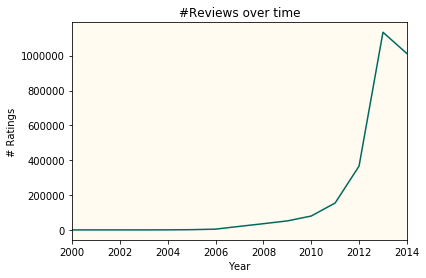

In [23]:
ax = reviews_by_time.groupby('year').reviewerId.sum().reset_index().plot(x='year',y='reviewerId', color='#00695c',\
                                                                         legend = False, title = '#Reviews over time')

ax.set_xlabel('Year')
ax.set_ylabel('# Ratings')
ax.set_facecolor('#fffbf0')

## Huge increase in reviews since 2011

In [24]:
reviews_by_time1= reviews_by_time[reviews_by_time['year']>2011]

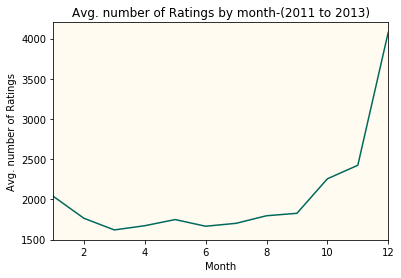

In [27]:
ax = reviews_by_time1[(reviews_by_time1['year']<>2014)].groupby(['month']).reviewerId.mean().reset_index().\
plot(x='month',y='reviewerId', legend = False, title = 'Avg. number of Ratings by month-(2011 to 2013)',color='#00695c')


ax.set_xlabel('Month')
ax.set_ylabel('Avg. number of Ratings')
ax.set_facecolor('#fffbf0')
## Highest number of reviews during holiday season

### Analyze products

#### Rerun this with the full metadata once Julius finishes scrapping

In [30]:
df_meta['asin'].nunique()

12725

In [31]:
df_meta.count()

BRAND                  12609
FEATURE_BULLETS        12725
NAME                   12716
ORIGINAL_PRICE          7807
PRODUCT_DESCRIPTION    12725
PRODUCT_INFORMATION    12725
SALE_PRICE              7807
URL                    12725
asin                   12725
dtype: int64

In [32]:
df_meta['ORIGINAL_PRICE'].replace('None', '0', inplace=True)

In [33]:
df_meta['ORIGINAL_PRICE']=df_meta['ORIGINAL_PRICE'].fillna('$0')
df_meta['SALE_PRICE']=df_meta['SALE_PRICE'].fillna('$0')

In [34]:
import re
def is_number(s):
    try:
        complex(s) # for int, long, float and complex
    except ValueError:
        return False
    return True

getMoney = lambda text : [ ''.join(x[0]) for x in re.findall(r'(\$?\d+([,\.]\d+)?k?)', text.replace(',', '').replace('$',''))]

def getAvg(x):
    s = average([(float(y) if is_number(y) else -1) for y in getMoney(x.SALE_PRICE)])
    o = average([(float(y) if is_number(y) else -1) for y in getMoney(x.ORIGINAL_PRICE)])
    return average([s, o])

In [35]:
df_meta['price2']=df_meta.apply(lambda x: getAvg(x), axis='columns')

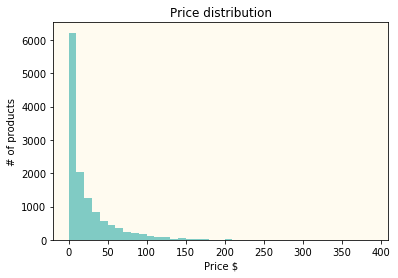

In [36]:
ax = df_meta['price2']\
      .plot(kind = 'hist',bins=range(0,400,10),\
       title = 'Price distribution'\
       ,facecolor='#80cbc4')
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_facecolor('#fffbf0')


plt.show()

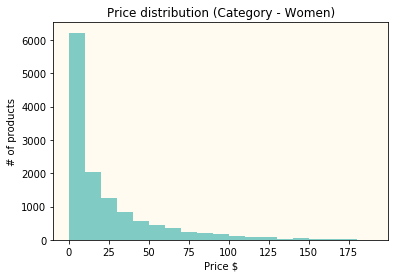

In [37]:
ax = df_meta[['price2']]\
      .plot(kind = 'hist',bins=range(0,200,10),\
       title = 'Price distribution (Category - Women)'\
       ,facecolor='#80cbc4', legend = False)
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_facecolor('#fffbf0')


plt.show()